# Linear Regression

y = a + b*X

El dataset que vamos a usar va a ser generado por nosotros (dummy)

X : 100 valores distribuidos según una distribución normal N(1.5, 2.5)

Vamos a elegir primeramente unos parámetros iniciales para el modelo, y luego aplicaremos la regresión lineal para obtener los parámetros óptimos y ver como disminuye el error con estos

y = 5 + 1.9*X + <b>e</b>

<b>e</b> es una componente de error distribuído por una normal N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(array([  9.,  31.,  81., 146., 186., 249., 176.,  84.,  33.,   5.]),
 array([-6.19210504, -4.69203668, -3.19196831, -1.69189995, -0.19183159,
         1.30823677,  2.80830513,  4.3083735 ,  5.80844186,  7.30851022,
         8.80857858]),
 <BarContainer object of 10 artists>)

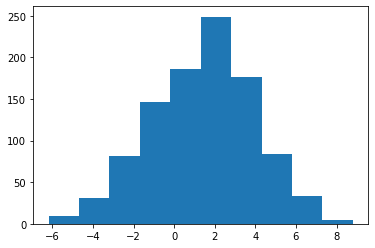

In [2]:
# Creamos el Feature vector X
X = 1.5 + 2.5*np.random.randn(1000)
plt.hist(X)

(array([  4.,  22.,  92., 190., 256., 219., 151.,  53.,  12.,   1.]),
 array([-2.63407148, -2.07916105, -1.52425062, -0.96934019, -0.41442976,
         0.14048067,  0.6953911 ,  1.25030153,  1.80521195,  2.36012238,
         2.91503281]),
 <BarContainer object of 10 artists>)

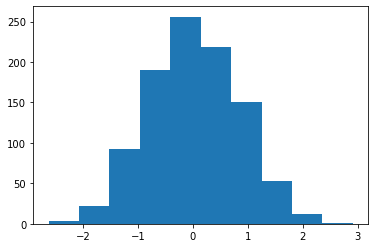

In [3]:
# Creamos los errores o residuos e del modelo
e = 0 + 0.8*np.random.randn(1000)
plt.hist(e)

In [4]:
y_pred = 5 + 1.9*X
y_pred = y_pred.tolist()

In [5]:
y_real = 5 + 1.9*X + e
y_real = y_real.tolist()

In [6]:
X = X.tolist()

In [7]:
data = pd.DataFrame()
data['X'] = X
data['Y'] = y_real
data['Predicted Y'] = y_pred
data.head()

,X,Y,Predicted Y
0,-3.916603,-0.493878,-2.441545
1,1.160353,6.942664,7.204671
2,4.963993,14.433163,14.431587
3,6.438472,17.301899,17.233097
4,-0.815746,2.811330,3.450083


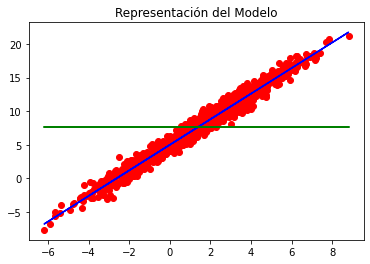

In [8]:
y_mean = [np.mean(y_real) for i in range(0, len(y_real))]

plt.plot(X, y_real, 'ro')
plt.plot(X, y_pred, 'blue')
plt.plot(X, y_mean, 'green')
plt.title('Representación del Modelo')
plt.show()

SSR Mean = Squared Errors Sum que desempeña la media como modelo 

SSR Model = Squared Errors Sum que desempeña el modelo

In [9]:
data['SSR Model'] = (data['Y'] - data['Predicted Y'])**2
data['SSR Mean'] = (data['Y'] - y_mean)**2

In [37]:
SSR_Model = sum(data['SSR Model'])
SSR_Mean = sum(data['SSR Mean'])

In [11]:
R2 = (SSR_Mean - SSR_Model)/SSR_Mean
R2 = round(R2*100, 3)
print(f'El modelo consigue reducir en un {R2}% el error cometido por la media')

El modelo consigue reducir en un 97.147% el error cometido por la media


## Teóricamente para una regresión lineal, el errror e que comete el modelo sigue una distribución normal, vamos a comprobar esto para el dataset dummy con el que estamos trabajando

### Recordemos que en caso de que el error no siga una distribución normal, significará que el dataset no es lineal, o mejor dicho, la variable objetivo no es resultado de una combinación lineal de las variables explicativas

(array([  1.,  12.,  53., 151., 219., 256., 190.,  92.,  22.,   4.]),
 array([-2.91503281, -2.36012238, -1.80521195, -1.25030153, -0.6953911 ,
        -0.14048067,  0.41442976,  0.96934019,  1.52425062,  2.07916105,
         2.63407148]),
 <BarContainer object of 10 artists>)

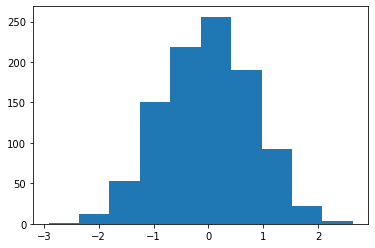

In [12]:
error = data['Predicted Y'] - data['Y']
plt.hist(error)

## Ahora, en vez de utilizar los parámetros de ejemplo (w = 1.9, b = 5), vamos a obtener los óptimos:

In [15]:
# Como necesitaremos las medias para los calculos, vamos a definirlas en variables
x_mean = np.mean(data['X'])
y_mean = np.mean(data['Y'])
# También el tamaño del dataset
n = len(data)
x_mean, y_mean, n

(1.4051870642069404, 7.687773285524993, 1000)

### Para obtener la W óptima, dividimos la covarianza de X e Y por la varianza de X

In [29]:
covarianza_XY = sum((data['X']-x_mean)*(data['Y']-y_mean))/n
varianza_X = sum((data['X']-x_mean)**2)/n

In [30]:
w_optima = covarianza_XY/varianza_X
w_optima

1.8994503109459426

### Ahora sacamos la b óptima (mirar fórmula en apuntes)

In [31]:
b_optima = y_mean - w_optima*x_mean
b_optima

5.0186902794799035

In [32]:
print(f'Valores óptimos: ')
print(f'   -> W = {w_optima}')
print(f'   -> b = {b_optima}')
print(f'El modelo resultante es: ')
print(f'y = {w_optima}x + {b_optima}')

Valores óptimos: 
   -> W = 1.8994503109459426
   -> b = 5.0186902794799035
El modelo resultante es: 
y = 1.8994503109459426x + 5.0186902794799035


### Vamos a probar ahora el modelo con los parámetros nuevos obtenidos

Para ello añadimos al dataset una columna con los valores y predichos por el modelo optimizado...

In [45]:
data['y_optimized_model'] = w_optima*data['X'] + b_optima

Calculamos la suma de los residuos cuadrados de esta nueva columna

In [48]:
SSR_optimizedModel = sum((data['Y'] - data['y_optimized_model'])**2)

In [49]:
R2_optimized = (SSR_Mean - SSR_optimizedModel)/(SSR_Mean)
R2_optimized_percent = R2_optimized*100
print(f'El modelo optimizado consigue reducir en un {R2_optimized_percent}% el error de la media')

El modelo optimizado consigue reducir en un 97.14827190500411% el error de la media


### Voy a comprobar que utilizando la librería de ScikitLearn salen los mismo parámetros

In [59]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()
X = np.array(data['X']).reshape(-1,1)
Y = np.array(data['Y']).reshape(-1,1)
model.fit(X, Y)
print(f'W: {model.coef_}')
print(f'b: {model.intercept_}')

W: [[1.89945031]]
b: [5.01869028]


#### Como vemos los valores salen EXACTAMENTE IGUALES a los obtenidos a través de las fórmulas